# Phân tích dữ liệu thời thiết
### 1.Dữ liệu và Bài toán
Dữ liệu bao gồm các cột:

- year, month, day, hour_value, minute: Thông tin thời gian (có thể dùng để tạo đặc trưng thời gian hoặc lọc dữ liệu).
- weather: Biến mục tiêu (target) cho bài toán phân loại, có các giá trị như Clear, Cloudy, Rainy, Foggy.
- temperature: Nhiệt độ (độ C).
- wind_speed: Tốc độ gió (km/h).
- wind_angle: Góc gió (độ).
- humidity: Độ ẩm (%).
- pressure: Áp suất khí quyển (hPa).
- visibility: Tầm nhìn (km).

Bài toán phân loại: Dự đoán trạng thái thời tiết (weather) dựa trên các đặc trưng như nhiệt độ, độ ẩm, áp suất, v.v.

Bài toán phân cụm: Nhóm các quan sát thời tiết thành các cụm dựa trên sự tương đồng của các đặc trưng, không sử dụng nhãn weather.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


Thống kê mô tả dữ liệu


In [7]:
df = pd.read_csv('Clean_data/clean_data_train.csv')
print(df.describe())

               year         month           day    hour_value        minute  \
count  82008.000000  82008.000000  82008.000000  82008.000000  82008.000000   
mean    2020.944140      6.492306     15.742745     11.564238     15.051215   
std        1.410013      3.448729      8.797215      6.946748     15.000004   
min     2019.000000      1.000000      1.000000      0.000000      0.000000   
25%     2020.000000      4.000000      8.000000      5.000000      0.000000   
50%     2021.000000      6.000000     16.000000     12.000000     30.000000   
75%     2022.000000      9.000000     23.000000     18.000000     30.000000   
max     2023.000000     12.000000     31.000000     23.000000     30.000000   

        temperature    wind_speed    wind_angle      humidity      pressure  \
count  82008.000000  82008.000000  82008.000000  82008.000000  82008.000000   
mean      26.940457      7.928678    135.532875     77.711150   1010.667130   
std        4.110240      6.070460    115.138290    

weather
Clear     59321
Cloudy    11932
Rainy      8099
Foggy      1761
Stormy      895
Name: count, dtype: int64


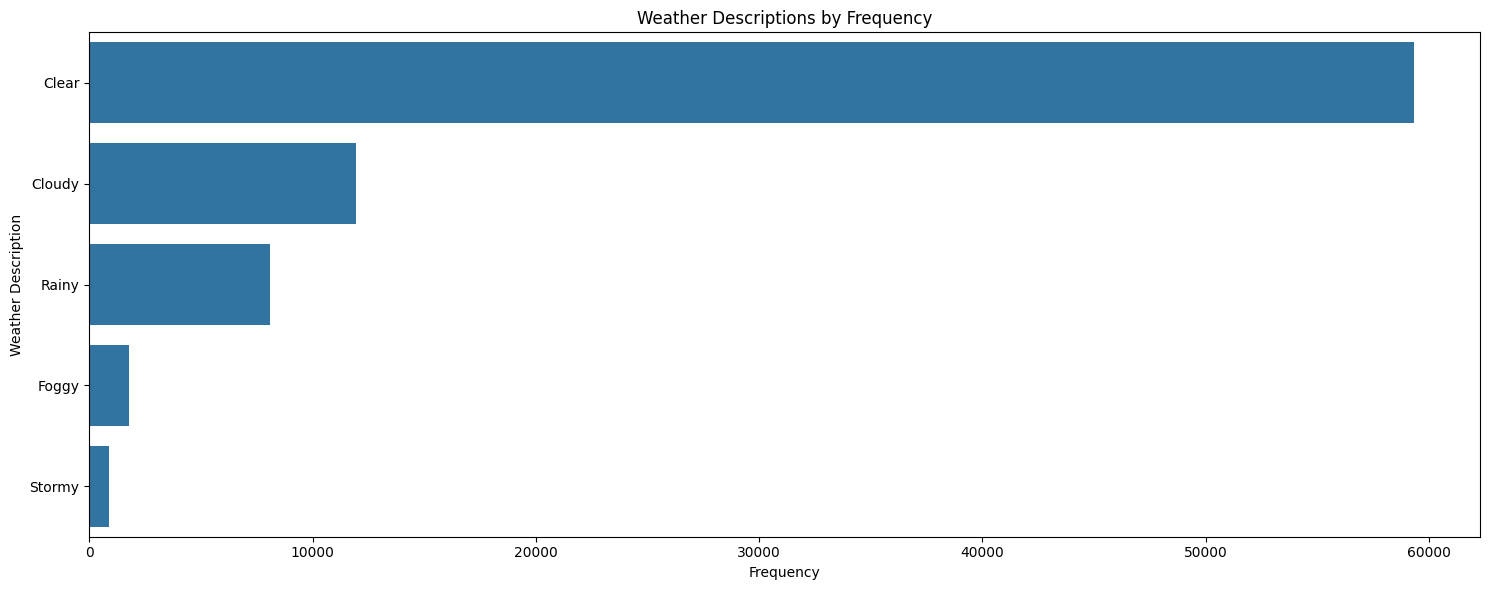

In [8]:
print(df['weather'].value_counts())

# Vẽ biểu đồ tần suất cho các giá trị weather
plt.figure(figsize=(15, 6))
weather_counts = df['weather'].value_counts().head(20)
sns.barplot(x=weather_counts.values, y=weather_counts.index)
plt.title('Weather Descriptions by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Weather Description')
plt.tight_layout()
plt.show()

## 2. Phân tích dữ liệu và lựa chọn đặc trưng

### Tương quan giữa các đặc trưng số:

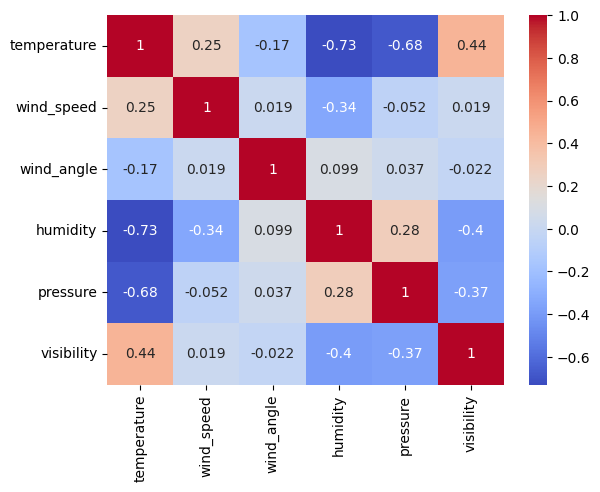

In [9]:
# Tính ma trận tương quan
corr_matrix = df[['temperature', 'wind_speed', 'wind_angle', 'humidity', 'pressure', 'visibility']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Không có đặc trưng nào có tương quan cao với nhau

### Phân bố đặc trưng theo thời tiết

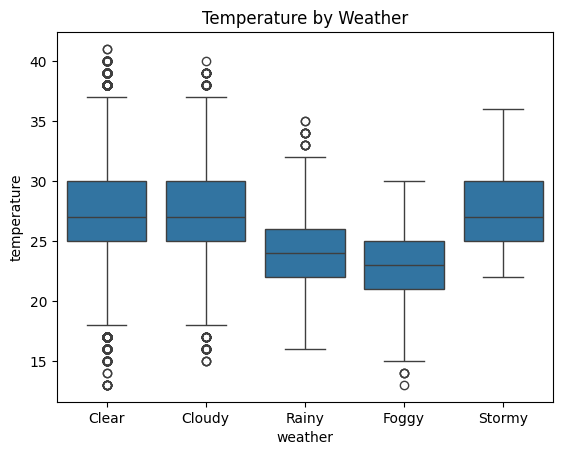

In [10]:
# Boxplot: temperature by Weather
sns.boxplot(x='weather', y='temperature', data=df)
plt.title('Temperature by Weather')
plt.show()


1. Temperature by Weather

    Nhận xét:
    - Nhiệt độ trung bình (median) dao động trong khoảng 25-30°C cho tất cả các loại thời tiết, không có sự khác biệt lớn giữa các lớp (Clear, Cloudy, Rainy, Foggy, Stormy).
    - Phân bố nhiệt độ khá tương đồng giữa các loại thời tiết, với IQR (khoảng tứ phân vị) gần giống nhau.
    - Có một số giá trị ngoại lai (outliers) ở cả năm loại thời tiết, đặc biệt ở Clear và Cloudy (nhiệt độ trên 35°C và dưới 20°C).
    
    Kết luận:
    - Temperature không có sự phân biệt rõ ràng giữa các loại thời tiết, nên có thể không phải là đặc trưng mạnh cho bài toán phân loại.
    - Tuy nhiên, nhiệt độ vẫn có thể hữu ích trong bài toán phân cụm, vì nó phản ánh một đặc tính vật lý quan trọng của thời tiết.

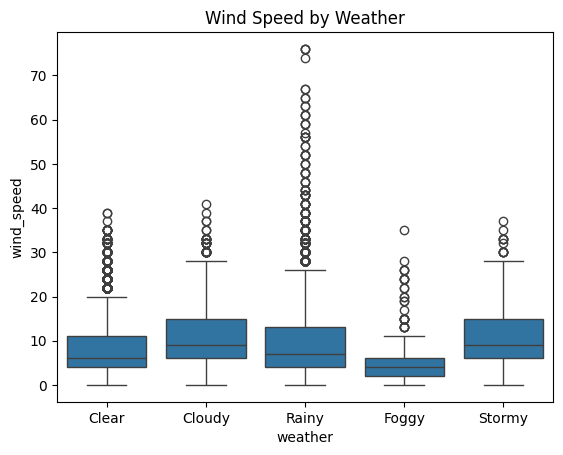

In [11]:
# Boxplot: wind_speed by Weather
sns.boxplot(x='weather', y='wind_speed', data=df)
plt.title('Wind Speed by Weather')
plt.show()


2. Wind Speed by Weather

    Nhận xét:
    - Tốc độ gió trung bình (median) dao động từ 5-15 km/h, nhưng có sự khác biệt đáng chú ý:
    - Rainy có tốc độ gió cao nhất, với nhiều giá trị ngoại lai vượt trên 50 km/h (cao nhất lên tới 70 km/h).
    - Foggy có tốc độ gió thấp nhất, hầu hết dưới 10 km/h.
    - Clear, Cloudy, và Stormy có phân bố khá tương đồng, dao động trong khoảng 5-20 km/h.
    - Rainy có nhiều giá trị ngoại lai lớn, cho thấy tốc độ gió cao bất thường trong điều kiện mưa.
    
    Kết luận:
    - Wind_speed là một đặc trưng quan trọng cho bài toán phân loại, vì nó có sự khác biệt rõ ràng giữa các loại thời tiết, đặc biệt là Rainy và Foggy.

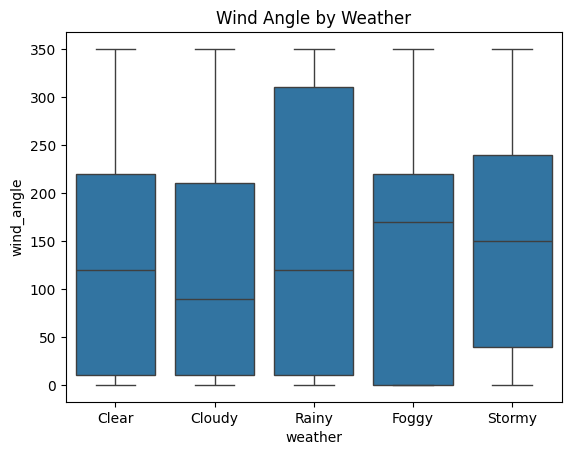

In [12]:
# Boxplot: wind_angle by Weather
sns.boxplot(x='weather', y='wind_angle', data=df)
plt.title('Wind Angle by Weather')
plt.show()


3. Wind Angle by Weather

    Nhận xét:
    - Góc gió trung bình dao động từ 150-250 độ, nhưng không có sự khác biệt rõ ràng giữa các loại thời tiết.
    - Rainy có phân bố rộng hơn (IQR lớn hơn), dao động từ khoảng 100 đến 300 độ, nhưng các loại thời tiết khác (Clear, Cloudy, Foggy, Stormy) có phân bố khá đồng đều.
    - Không có giá trị ngoại lai đáng chú ý. 
    
    Kết luận:
    - Wind_angle không cho thấy sự phân biệt mạnh giữa các loại thời tiết, nên có thể không hữu ích cho bài toán phân loại.
    Trong bài toán phân cụm, đặc trưng này có thể được giữ lại nếu bạn muốn phân cụm dựa trên hướng gió, nhưng cần kết hợp với các đặc trưng khác (như wind_speed) để có ý nghĩa.

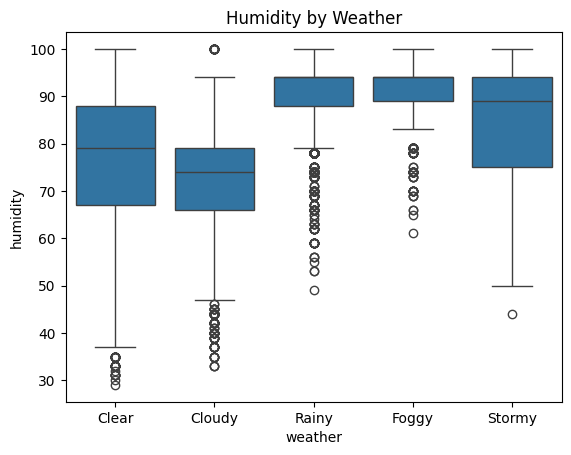

In [13]:
# Boxplot: humidity by Weather
sns.boxplot(x='weather', y='humidity', data=df)
plt.title('Humidity by Weather')
plt.show()


4. Humidity by Weather

    Nhận xét:
    - Độ ẩm trung bình có sự khác biệt rõ rệt giữa các loại thời tiết:
    - Foggy và Rainy có độ ẩm cao nhất, trung bình khoảng 90-100%, với ít giá trị ngoại lai.
    - Clear và Cloudy có độ ẩm thấp hơn, trung bình khoảng 70-80%.
    - Stormy nằm ở giữa, với độ ẩm trung bình khoảng 80-90%.
    - Phân bố độ ẩm của Foggy và Rainy rất tập trung (IQR hẹp), trong khi Clear và Cloudy có phân bố rộng hơn.
    
    Kết luận:
    - Humidity là một đặc trưng rất quan trọng cho bài toán phân loại, vì nó phân biệt rõ ràng giữa các loại thời tiết (đặc biệt là Foggy/Rainy với Clear/Cloudy).
    - Trong bài toán phân cụm, độ ẩm cũng sẽ đóng vai trò lớn trong việc hình thành các cụm (ví dụ: cụm thời tiết "ẩm ướt" như Foggy và Rainy, và cụm "khô" như Clear).

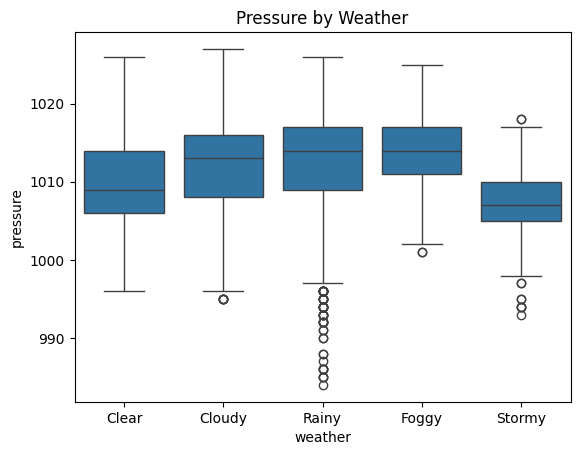

In [14]:
# Boxplot: pressure by Weather
sns.boxplot(x='weather', y='pressure', data=df)
plt.title('Pressure by Weather')
plt.show()


5. Pressure by Weather

    Nhận xét:
    - Áp suất trung bình dao động từ 1000-1020 hPa, nhưng có sự khác biệt giữa các loại thời tiết:
    - Clear và Cloudy có áp suất cao hơn, trung bình khoảng 1010-1020 hPa.
    - Rainy, Foggy, và Stormy có áp suất thấp hơn, trung bình khoảng 1000-1010 hPa.
    - Phân bố áp suất của Rainy, Foggy, và Stormy có nhiều giá trị ngoại lai thấp (dưới 990 hPa), cho thấy áp suất giảm mạnh trong các điều kiện thời tiết xấu.
    
    Kết luận:
    - Pressure là một đặc trưng quan trọng cho bài toán phân loại, vì áp suất thấp thường liên quan đến thời tiết xấu (Rainy, Foggy, Stormy), trong khi áp suất cao liên quan đến thời tiết tốt (Clear, Cloudy).
    - Đặc trưng này cũng hữu ích cho bài toán phân cụm, vì nó có thể giúp phân biệt các cụm thời tiết "ổn định" (áp suất cao) và "bất ổn" (áp suất thấp).

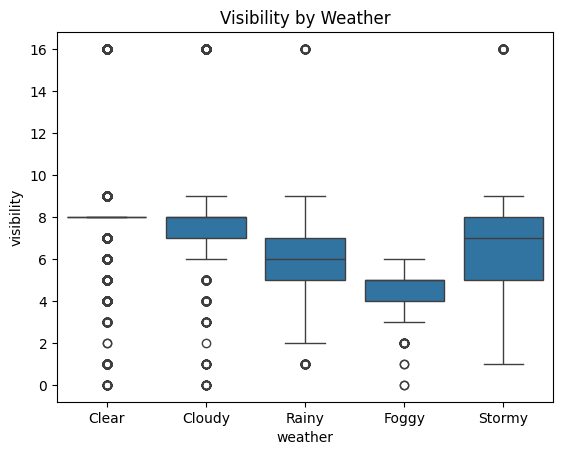

In [15]:
# Boxplot: visibility by Weather
sns.boxplot(x='weather', y='visibility', data=df)
plt.title('Visibility by Weather')
plt.show()


6. Visibility by Weather

    Nhận xét:
    - Tầm nhìn có sự khác biệt rất rõ rệt giữa các loại thời tiết:
    - Clear có tầm nhìn cao nhất, trung bình khoảng 10-15 km.
    - Cloudy thấp hơn một chút, trung bình khoảng 8-12 km.
    - Rainy, Foggy, và Stormy có tầm nhìn rất thấp, trung bình dưới 5 km, đặc biệt Foggy có tầm nhìn thấp nhất (thường dưới 2 km).
    - Phân bố của Foggy rất tập trung (IQR rất hẹp), trong khi Clear và Cloudy có phân bố rộng hơn.
    
    Kết luận:
    - Visibility là một đặc trưng cực kỳ quan trọng cho bài toán phân loại, vì nó phân biệt rõ ràng giữa các loại thời tiết (đặc biệt là Foggy với các loại khác).
    - Trong bài toán phân cụm, tầm nhìn sẽ giúp hình thành các cụm thời tiết "tầm nhìn thấp" (Foggy, Rainy, Stormy) và "tầm nhìn cao" (Clear, Cloudy).

In [5]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

for col in ['temperature', 'wind_speed', 'wind_angle', 'humidity', 'pressure', 'visibility']:
    print(f'Outliers in {col}:', detect_outliers(df, col).count())

Outliers in temperature: 56
Outliers in wind_speed: 2518
Outliers in wind_angle: 0
Outliers in humidity: 353
Outliers in pressure: 36
Outliers in visibility: 18243
